In [3]:
import numpy as np
import csv

with open('MySQL_Schema1.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')

    ids = []
    countys = []
    restaurants = []
    populations = []
    percentages = []
    
    for row in readCSV:
        county = row[1]
        restaurants = row[2]
        population = row[3]
        percentage = row[4]

        countys.append(county)
        populations.append(population)
        
    print(countys)
    print(populations)

    whichCounty = input('Which county do you wish to know the population?')
    coldex = countys.index(whichCounty)

    thePopulation = populations[coldex]

    print('The population of',whichCounty,'is:',thePopulation)

['county', 'Cleburne', 'Prentiss', 'Jasper', 'Holmes', 'Coal', 'Ashley', 'St Francis', 'Lawrence', 'Lafayette', 'Mississippi', 'Haskell', 'Randolph', 'Poinsett', 'Lawrence', 'Sevier', 'Claiborne', 'Cocke', 'Bell', 'Yazoo', 'Quitman']
['population', '25603', '1014', '16529', '18509', '5709', '20958', '239', '16970', '7163', '44232', '1976', '17561', '24144', '12601', '94570', '9164', '35201', '27841', '27811', '2235']
Which county do you wish to know the population?Bell
The population of Bell is: 27841


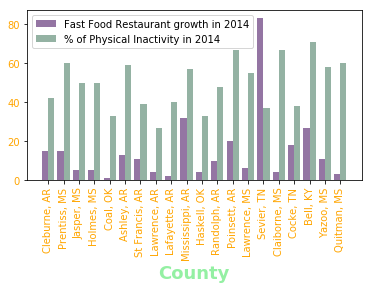

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv


with open('MySQL_Schema1.csv') as csvfile:
    plt.bars = csv.reader(csvfile, delimiter=',')

    percentage = []
    county = []
    restaurants = []
    
# data
percentage = [42, 60, 50, 50, 33, 59, 39, 27, 40, 57, 33, 48, 67, 55, 37, 67, 38, 71, 58, 60]

county = ["Cleburne, AR", "Prentiss, MS", "Jasper, MS", "Holmes, MS", "Coal, OK", "Ashley, AR", "St Francis, AR",
          "Lawrence, AR", "Lafayette, AR", "Mississippi, AR", "Haskell, OK", "Randolph, AR", "Poinsett, AR",
          "Lawrence, MS", "Sevier, TN", "Claiborne, MS", "Cocke, TN", "Bell, KY", "Yazoo, MS", "Quitman, MS"]

restaurants = [15, 15, 5, 5, 1, 13, 11, 4, 2, 32, 4, 10, 20, 6, 83, 4, 18, 27, 11, 3]
        

# plot
plt.figure(1)
positions = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38]
positions2 = [0.8,2.8,4.8,6.8,8.8,10.8,12.8,14.8,16.8,18.8,20.8,22.8,24.8,26.8,28.8,30.8,32.8,34.8,36.8,38.8]
positions3= [0.4,2.4,4.4,6.4,8.4,10.4,12.4,14.4,16.4,18.4,20.4,22.4,24.4,26.4,28.4,30.4,32.4,34.4,36.4,38.4]

# Bars
barWidth = 0.5
plt.bar(positions, restaurants, color = (0.3,0.1,0.4,0.6), label='Fast Food Restaurant growth in 2014')
plt.bar(positions2, percentage, color= (0.3,0.5,0.4,0.6), label='% of Physical Inactivity in 2014')
 
# Rotation of the bars names
plt.xticks(positions3, county, rotation=90, color='orange')
plt.xlabel('County', fontweight='bold', color = (0.3,0.9,0.4,0.6), fontsize='18')
plt.yticks(color='orange')


plt.subplots_adjust(bottom=0.4, top=0.99)
plt.legend()
plt.savefig('myPlot.png')
plt.show()

In [6]:
from __future__ import print_function
import csv
import mysql.connector

print("MySQL_Schema.csv")
conn = mysql.connector.connect(host="127.0.0.1", user="root", passwd="1315", db="project_j")
cursor = conn.cursor()

sql= """DROP TABLE IF EXISTS `health_001`; CREATE TABLE `health_001` (
  `id` int(11) NOT NULL AUTO_INCREMENT,
  `county` varchar(25) NOT NULL,
  `restaurants` decimal(10,0) NOT NULL,
  `population` decimal(10,0) NOT NULL,
  `percentage` decimal(19,2) NOT NULL,
  PRIMARY KEY (`id`))"""
cursor.execute(sql)

with open('MySQL_Schema.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter = ',')
    for row in reader:
        print(row['id'], row['county'], row['restaurants'], row['population'], row['percentage'])
       
        conn = mysql.connector.connect(host="127.0.0.1", user="root", passwd="1315", db="project_j")
        sql_statement = "INSERT INTO health_001(id,county,restaurants,population,percentage) VALUES (%s,%s,%s,%s,%s)"
        cur = conn.cursor()
        cur.executemany(sql_statement,[(row['id'], row['county'], row['restaurants'], row['population'], row['percentage'])])
        
        conn.commit()
        
cursor.close()       
conn.close()

MySQL_Schema.csv
1 Cleburne 16 25603 42.10
2 Prentiss 16 1014 41.30
3 Jasper 4 16529 40.80
4 Holmes 4 18509 39.70
5 Coal 1 5709 39.50
6 Ashley 15 20958 39.20
7 St Francis 10 239 38.90
8 Lawrence 6 16970 38.80
9 Lafayette 3 7163 38.80
10 Mississippi 32 44232 38.80
11 Haskell 4 1976 38.70
12 Randolph 8 17561 38.60
13 Poinsett 17 24144 38.50
14 Lawrence 6 12601 38.40
15 Sevier 97 94570 38.30
16 Claiborne 5 9164 38.20
17 Cocke 16 35201 38.10
18 Bell 24 27841 38.00
19 Yazoo 10 27811 38.00
20 Quitman 4 2235 38.00


ReferenceError: weakly-referenced object no longer exists